In [50]:
# !pip install xgboost

In [2]:
from xgboost import XGBClassifier

model = XGBClassifier()


# from sklearn.naive_bayes import GaussianNB

# model = GaussianNB()

In [3]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(sklearn.base.ClassifierMixin, XGBModel)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |
 |  Parameters
 |  ----------
 |
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |
 |      max_depth :  typing.Optional[int]
 |
 |          Maximum tree depth for base learners.
 |
 |      max_leaves : typing.Optional[int]
 |
 |          Maximum number of leaves; 0 indicates no limit.
 |
 |      max_bin : typing.Optional[int]
 |
 |          If using histogram-based algorithm, maximum number of bins per feature
 |
 |      grow_policy : typing.Optional[str]
 |
 |          Tree growing policy.
 |
 |          - depthwise: Favo

In [52]:
from pandas import read_csv

file_path = "/workspaces/eargweth/no_null_encoded_titanic.csv"
dataset = read_csv(file_path)



In [53]:
label_of_the_column_that_we_want = "survived"
y = dataset[label_of_the_column_that_we_want]
display(y)

0      0
1      1
2      1
3      1
4      0
      ..
709    0
710    0
711    1
712    1
713    0
Name: survived, Length: 714, dtype: int64

In [54]:
columns_to_drop = ['survived', 'alive']

X = dataset.drop(columns_to_drop, axis = 1)

display(X)

,Unnamed: 0.1,Unnamed: 0,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,22.0,1,0,7.2500,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,1,1,38.0,1,0,71.2833,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,2,2,3,26.0,0,0,7.9250,False,True,True,...,False,False,False,False,False,False,False,False,False,True
3,3,3,1,35.0,1,0,53.1000,False,False,True,...,False,False,True,False,False,False,False,False,False,True
4,4,4,3,35.0,0,0,8.0500,True,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,885,885,3,39.0,0,5,29.1250,False,False,True,...,False,False,False,False,False,False,False,False,True,False
710,886,886,2,27.0,0,0,13.0000,True,True,False,...,False,False,False,False,False,False,False,False,False,True
711,887,887,1,19.0,0,0,30.0000,False,True,True,...,False,True,False,False,False,False,False,False,False,True
712,889,889,1,26.0,0,0,30.0000,True,True,False,...,False,False,True,False,False,False,False,True,False,False


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [57]:
model.fit(X_train, y_train) #fit means train
# X means your prompt examples - the examples of the things that the model should learn to analyze
# y means your response/prediction examples - the examples of the things that the model should have predicted for the different prompt examples


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [59]:
predictions = model.predict(X_test)

In [60]:
predictions

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0])

0.770949720670391
[0.8317757  0.68055556]
[0.79464286 0.73134328]


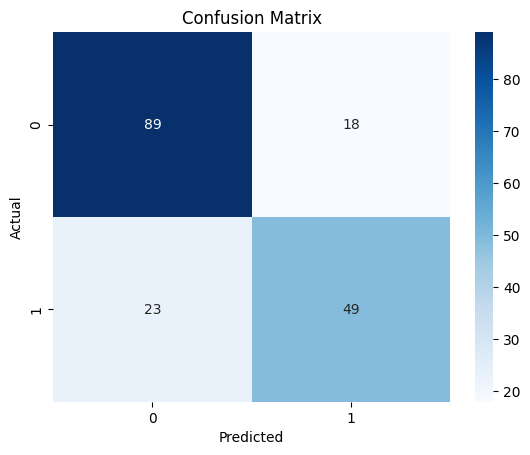

In [61]:
val_score = accuracy_score(y_test, predictions)

print(val_score)

recall_val_score = recall_score(y_test, predictions, average = None)

print(recall_val_score)

prec_val_score = precision_score(y_test, predictions, average = None)

print(prec_val_score)

confusion_matrix_variable_goes_here = confusion_matrix(y_test, predictions)

from seaborn import heatmap
from matplotlib import pyplot
heatmap(confusion_matrix_variable_goes_here, annot=True, fmt='d', cmap='Blues')
pyplot.xlabel('Predicted')
pyplot.ylabel('Actual')
pyplot.title('Confusion Matrix')
pyplot.show()